In [5]:
Alpha_Name = "AlphaNet_Original_Input_10d_return"
path = '/home/wuwenjun/Data/' + Alpha_Name +'/'
target = "5d_ret"
import time
import os
from Research.backtest.bt import BTDaily
from Research.feature.ft import FeatureAnalysis
import Research.utils.namespace as namespace
import Research.utils.normalization as norm
from Platform.database.mysql import MysqlAPI
from Platform.utils.persistence import convert_to_standard_daily_feature_csv, convert_to_standard_daily_feature_par
from Platform.config.mysql_info import FACTOR_LIB_MYSQL_TIO
import DataAPI
from os import walk
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from progressbar import ProgressBar
from tqdm import tqdm
import multiprocessing as mp

In [2]:
path_list = []
data_path = path + "Data/"
dataframe_list = pd.DataFrame()
for f, _, i in walk(data_path):
    for j in tqdm(i):
        path_list.append(j)
path_list.sort()
path_list

100%|██████████| 26/26 [00:00<00:00, 417823.39it/s]


['2015-01-01_2015-03-01.par',
 '2015-03-01_2015-06-01.par',
 '2015-06-01_2015-09-01.par',
 '2015-09-01_2016-01-01.par',
 '2016-01-01_2016-03-01.par',
 '2016-03-01_2016-06-01.par',
 '2016-06-01_2016-09-01.par',
 '2016-09-01_2017-01-01.par',
 '2017-01-01_2017-03-01.par',
 '2017-03-01_2017-06-01.par',
 '2017-06-01_2017-09-01.par',
 '2017-09-01_2018-01-01.par',
 '2018-01-01_2018-03-01.par',
 '2018-03-01_2018-06-01.par',
 '2018-06-01_2018-09-01.par',
 '2018-09-01_2019-01-01.par',
 '2019-01-01_2019-03-01.par',
 '2019-03-01_2019-06-01.par',
 '2019-06-01_2019-09-01.par',
 '2019-09-01_2020-01-01.par',
 '2020-01-01_2020-03-01.par',
 '2020-03-01_2020-06-01.par',
 '2020-06-01_2020-09-01.par',
 '2020-09-01_2021-01-01.par',
 '2021-01-01_2021-03-01.par',
 '2021-03-01_2021-06-01.par']

In [13]:
a = list(i for i in range(10))
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

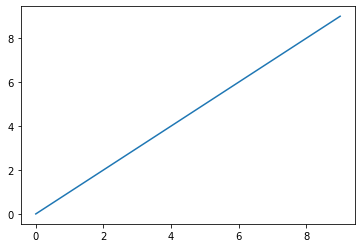

In [17]:
from matplotlib import pyplot as plt
import matplotlib.image as mpig


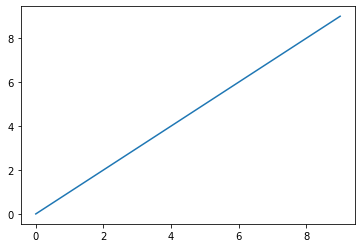

In [21]:
plt.plot(a)
plt.savefig('squares_plot.png')

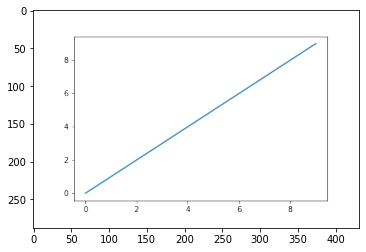

In [23]:
plt.imshow(mpig.imread("squares_plot.png"))

In [26]:
Alpha_Name = "AlphaNet_Original_Input_5d_return"
start_time = "2021-01-01"
forecast_months = 6 # months
target = "5d_ret"
feat_num = 9
from os import walk
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from progressbar import ProgressBar
from tqdm import tqdm
import torch.utils.data as Data
import torch.optim as optim
from tqdm import tqdm
from torch.autograd import Variable
import time
import multiprocessing as mp
from os import walk
import matplotlib.pyplot as plt
path = '/home/wuwenjun/Data/' + Alpha_Name +'/'
output_path = "/home/wuwenjun/Alpha_Factor/" + Alpha_Name + "/result/"
model_dir = "/home/wuwenjun/Alpha_Factor/" + Alpha_Name + "/model/"
if os.path.exists(output_path) == False:
    os.makedirs(model_dir)
if os.path.exists(model_path) == False:
    os.makedirs(model_dir)
time_list = []
data_path = path + "Data/"
dataframe_list = pd.DataFrame()
for f, _, i in walk(data_path):
    for j in tqdm(i):
        time_list.append(j)
time_list.sort()     
for count,item in enumerate(time_list):
    if item.startswith(start_time):
        train_timestamp = time_list[:count]
        test_timestamp = time_list[count:count + forecast_months//3]
        break
display(train_timestamp)
display(test_timestamp)

100%|██████████| 26/26 [00:00<00:00, 263410.40it/s]


['2015-01-01_2015-03-01.par',
 '2015-03-01_2015-06-01.par',
 '2015-06-01_2015-09-01.par',
 '2015-09-01_2016-01-01.par',
 '2016-01-01_2016-03-01.par',
 '2016-03-01_2016-06-01.par',
 '2016-06-01_2016-09-01.par',
 '2016-09-01_2017-01-01.par',
 '2017-01-01_2017-03-01.par',
 '2017-03-01_2017-06-01.par',
 '2017-06-01_2017-09-01.par',
 '2017-09-01_2018-01-01.par',
 '2018-01-01_2018-03-01.par',
 '2018-03-01_2018-06-01.par',
 '2018-06-01_2018-09-01.par',
 '2018-09-01_2019-01-01.par',
 '2019-01-01_2019-03-01.par',
 '2019-03-01_2019-06-01.par',
 '2019-06-01_2019-09-01.par',
 '2019-09-01_2020-01-01.par',
 '2020-01-01_2020-03-01.par',
 '2020-03-01_2020-06-01.par',
 '2020-06-01_2020-09-01.par',
 '2020-09-01_2021-01-01.par']

['2021-01-01_2021-03-01.par', '2021-03-01_2021-06-01.par']

In [30]:
model_path = (model_dir + test_timestamp[0].split("_")[0] + "_" + test_timestamp[-1].split("_")[-1]).replace(".par","/")
print(model_path)

/home/wuwenjun/Alpha_Factor/AlphaNet_Original_Input_5d_return/model/2021-01-01_2021-06-01/


In [32]:
np.save("number.npy", a)